# -

In [1]:
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'train'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 30, 
                                   #width_shift_range = 0.2,
                                   #height_shift_range = 0.2,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,  
                                   horizontal_flip=True,
                                   #vertical_flip = True,
                                   fill_mode = 'nearest')

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_dir = 'validation'

valid_datagen = ImageDataGenerator(rescale = 1./255)

valid_generator = valid_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (275, 205),
                 batch_size = 32,
                 class_mode = 'categorical',
                 shuffle = False)

Found 4800 images belonging to 6 classes.


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = 'test'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (275, 205),
                 batch_size = 32,
                 class_mode = 'categorical',
                 shuffle = False)

Found 7200 images belonging to 6 classes.


In [18]:
vgg = load_model('/vgg.h5')
resnet = load_model('/resnet.h5')
xception = load_model('/Xception.h5')
alexnet = load_model('/alexnet.h5')

In [34]:
im_input = Input(shape=(275,205,3))

resnet._name = 'test1'
vgg._name='test2'
xception._name = 'test3'
alexnet._name = 'test4'

x1 = resnet(im_input)
x2 = vgg(im_input)
x3 = xception(im_input)
x4 = alexnet(im_input)

merged = keras.layers.Add()([0.3*x1, 0.2*x3, 0.25*x2, 0.25*x4])
model3 = Model(im_input, merged)

model3.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate=0.0001),
              metrics = ['acc'])

loss, accuracy = model3.evaluate(valid_generator,
                                steps = 150)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

150/150 [==============================] - 63s 420ms/step - loss: 0.7219 - acc: 0.7533
Loss = 0.72194
Accuracy = 0.75333


In [36]:
valid_generator.reset()

Y_pred = model3.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

               precision    recall  f1-score   support

        anger       0.73      0.70      0.71       800
embarrassment       0.74      0.72      0.73       800
        happy       0.92      0.94      0.93       800
   neutrality       0.73      0.94      0.82       800
          sad       0.81      0.75      0.78       800
       unrest       0.56      0.47      0.51       800

     accuracy                           0.75      4800
    macro avg       0.75      0.75      0.75      4800
 weighted avg       0.75      0.75      0.75      4800



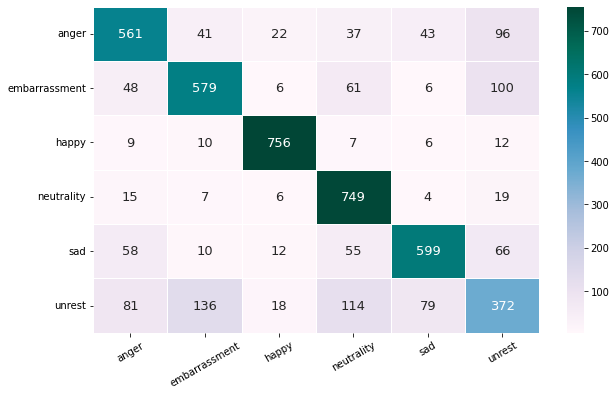

In [37]:
cm = confusion_matrix(valid_generator.classes, y_pred)
plt.figure(figsize=(10,6))
label = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
sns.heatmap(cm, xticklabels=label, yticklabels=label,annot=True, annot_kws={"size": 13}, cmap='PuBuGn',fmt="g", linewidths = 0.5)
plt.xticks(rotation = 30 )
#plt.savefig('/ensemble_cm2.png')